In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('stroke.csv')

In [3]:
# drop irrelevant column
df = df.drop("id", axis=1)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# identify null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
# show null count (only bmi has null values)
df.isnull().sum().sort_values(ascending = False)

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Categorical Features
cat_feats = ['hypertension', 'heart_disease', 'smoking_status', 'work_type', 'ever_married', 'gender', 'Residence_type']

In [8]:
for feat in cat_feats:
    prob = df[[feat, 'stroke']].groupby(feat, as_index = False).mean().sort_values(by = 'stroke', ascending = False)
    print(prob)
    print('-'*30)

   hypertension    stroke
1             1  0.132530
0             0  0.039679
------------------------------
   heart_disease    stroke
1              1  0.170290
0              0  0.041787
------------------------------
    smoking_status    stroke
1  formerly smoked  0.079096
3           smokes  0.053232
2     never smoked  0.047569
0          Unknown  0.030440
------------------------------
       work_type    stroke
3  Self-employed  0.079365
2        Private  0.050940
0       Govt_job  0.050228
4       children  0.002911
1   Never_worked  0.000000
------------------------------
  ever_married    stroke
1          Yes  0.065613
0           No  0.016505
------------------------------
   gender    stroke
1    Male  0.051064
0  Female  0.047094
2   Other  0.000000
------------------------------
  Residence_type    stroke
1          Urban  0.052003
0          Rural  0.045346
------------------------------


<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

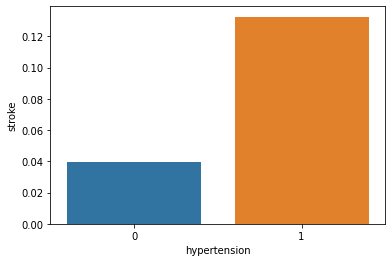

In [9]:
# those with hypertension have high chance of stroke
prob = df[['hypertension', 'stroke']].groupby('hypertension', as_index = False).mean().sort_values(by = 'stroke', ascending = False)
sns.barplot(x='hypertension', y='stroke', data=prob)

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

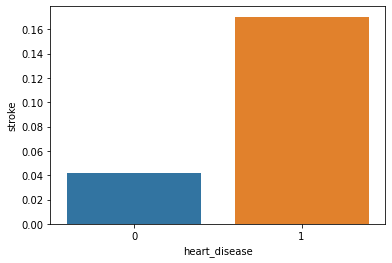

In [10]:
# those with heart disease have high chance of stroke
prob = df[['heart_disease', 'stroke']].groupby('heart_disease', as_index = False).mean().sort_values(by = 'stroke', ascending = False)
sns.barplot(x='heart_disease', y='stroke', data=prob)

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

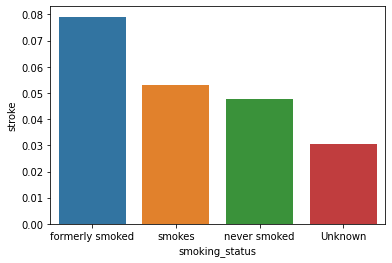

In [11]:
# those who have smoked or still smokes have higher chance of stroke
prob = df[['smoking_status', 'stroke']].groupby('smoking_status', as_index = False).mean().sort_values(by = 'stroke', ascending = False)
sns.barplot(x='smoking_status', y='stroke', data=prob)

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

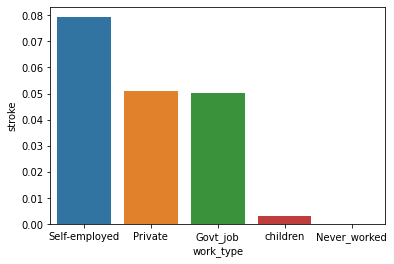

In [12]:
# those who are self-employed have higher chance of stroke
prob = df[['work_type', 'stroke']].groupby('work_type', as_index = False).mean().sort_values(by = 'stroke', ascending = False)
sns.barplot(x='work_type', y='stroke', data=prob)

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

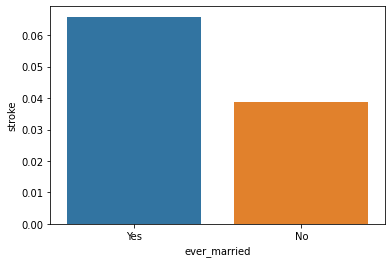

In [33]:
# those who were married have higher chance of stroke
prob = df[['ever_married', 'stroke', 'age']].where(df['age'] > 21).groupby('ever_married', as_index = False).mean().sort_values(by = 'stroke', ascending = False)
sns.barplot(x='ever_married', y='stroke', data=prob)

<AxesSubplot:xlabel='gender', ylabel='stroke'>

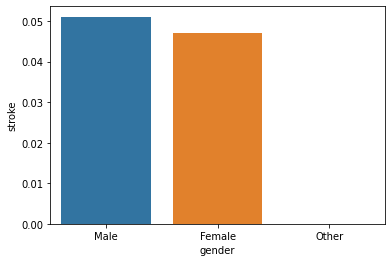

In [14]:
prob = df[['gender', 'stroke']].groupby('gender', as_index = False).mean().sort_values(by = 'stroke', ascending = False)
sns.barplot(x='gender', y='stroke', data=prob)

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

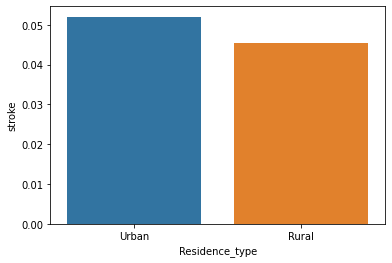

In [15]:
prob = df[['Residence_type', 'stroke']].groupby('Residence_type', as_index = False).mean().sort_values(by = 'stroke', ascending = False)
sns.barplot(x='Residence_type', y='stroke', data=prob)

In [16]:
# Numerical Features
num_feats = ['bmi', 'age', 'avg_glucose_level']

In [17]:
# stats on numerical features
for feat in num_feats:
    print(df[feat].describe())
    print('-'*30)

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64
------------------------------
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64
------------------------------
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64
------------------------------


<AxesSubplot:>

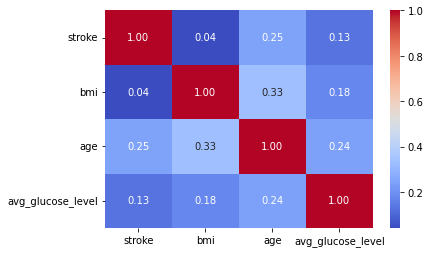

In [18]:
# correlation between numerical features
corr = df[['stroke', 'bmi', 'age', 'avg_glucose_level']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

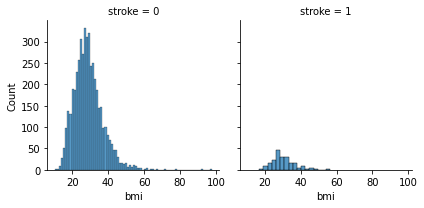

In [19]:
# age distribution by stroke (older the patient, higher the chance of stroke)
grid = sns.FacetGrid(df, col='stroke')
grid.map(sns.histplot, 'bmi')

<AxesSubplot:ylabel='stroke'>

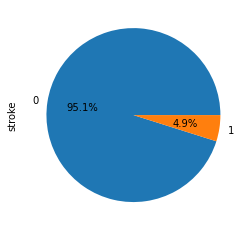

In [20]:
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

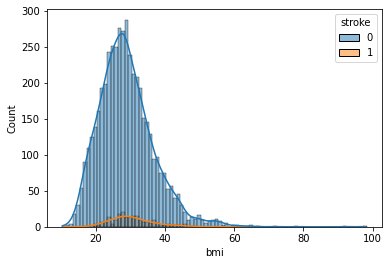

In [21]:
sns.histplot(data=df, x='bmi', hue='stroke', binwidth=1, kde=True)

In [22]:
prob = df[['age', 'stroke']].groupby('age', as_index = False).mean().sort_values(by = 'stroke', ascending = False)
print(prob.min())

age       0.08
stroke    0.00
dtype: float64


In [23]:
prob = df[df['gender']=='Other']
print(prob)

     gender   age  hypertension  heart_disease ever_married work_type  \
3116  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0  
